In [26]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', None)
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
import seaborn as sns



Read Data

In [27]:
data = pd.read_csv('data/CarPrice_Assignment.csv')
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Dataset is clear, so we can continue

In [29]:
CompanyName = data['CarName'].apply(lambda x: x.split(' ')[0])

data.insert(3, 'CompanyName', CompanyName)

data.drop(['CarName'], axis=1, inplace=True)

data.drop(['car_ID'], axis=1, inplace=True)

data.head()

symboling  CompanyName fueltype aspiration doornumber      carbody  \
0          3  alfa-romero      gas        std        two  convertible   
1          3  alfa-romero      gas        std        two  convertible   
2          1  alfa-romero      gas        std        two    hatchback   
3          2         audi      gas        std       four        sedan   
4          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi       3.47   
1        2548       dohc           four         130       mpfi       3.47   
2        2823       ohcv            six         152       mpfi       2.68   
3        2337        ohc           four         109       mpfi       3.19   
4        2824        ohc           five         136       mpfi       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0    2.68               9.0         111     5000       21          27  13495.0  
1    2.68               9.0         111     5000       21          27  16500.0  
2    3.47               9.0         154     5000       19          26  16500.0  
3    3.40              10.0         102     5500       24          30  13950.0  
4    3.40               8.0         115     5500       18          22  17450.0

In [30]:
def get_variable_type(element):
    if element==0:
        return "Not Known"
    elif element < 10 and element!=0 :
        return "Categorical"
    elif element >= 10:
        return "Contineous"

def predict_variable_type(metadata_matrix):
    metadata_matrix["Variable_Type"] = metadata_matrix["Valeurs_Uniques_Count"].apply(get_variable_type).astype(str)
    metadata_matrix["frequency"] = metadata_matrix["Null_Count"] - metadata_matrix["Null_Count"]
    metadata_matrix["frequency"].astype(int)
    return metadata_matrix 

def get_meta_data(dataframe):
    metadata_matrix = pd.DataFrame({
        'Datatype': dataframe.dtypes.astype(str),
        'Non_Null_Count': dataframe.count(axis=0).astype(int),
        'Null_Count': dataframe.isnull().sum().astype(int),
        'Null_Percentage': dataframe.isnull().sum()/len(dataframe) * 100,
        'Valeurs_Uniques_Count': dataframe.nunique().astype(int)
    })

    metadata_matrix = predict_variable_type(metadata_matrix)
    return metadata_matrix

def list_potential_categorical_type(dataframe, data):
    metadata_matrix_categorical = dataframe[dataframe["Variable_Type"] == "Categorical"]
    
    length = len(metadata_matrix_categorical)
    if length == 0:
        print('Everything is ok')
    else:
        metadata_matrix_categorical = metadata_matrix_categorical.filter(["Datatype", "Valeurs_Uniques_Count"])
        metadata_matrix_categorical.sort_values(["Valeurs_Uniques_Count"], axis=0, ascending=False, inplace=True)
        col_to_check = metadata_matrix_categorical.index.tolist()
        name_list = []
        values_list = []
        
        for name in col_to_check :
            name_list.append(name)
            values_list.append(data[name].unique())
        
        temp = pd.DataFrame({"index":name_list, "Valeurs_Uniques": values_list})
        metadata_matrix_categorical = metadata_matrix_categorical.reset_index()
        metadata_matrix_categorical = pd.merge(metadata_matrix_categorical,temp, how='inner', on='index')
        display(metadata_matrix_categorical.set_index("index"))

In [31]:
metadata = get_meta_data(data)
list_potential_categorical_type(metadata, data)

Datatype  Valeurs_Uniques_Count  \
index                                            
fuelsystem       object                      8   
enginetype       object                      7   
cylindernumber   object                      7   
symboling         int64                      6   
carbody          object                      5   
drivewheel       object                      3   
fueltype         object                      2   
aspiration       object                      2   
doornumber       object                      2   
enginelocation   object                      2   

                                                Valeurs_Uniques  
index                                                            
fuelsystem       [mpfi, 2bbl, mfi, 1bbl, spfi, 4bbl, idi, spdi]  
enginetype             [dohc, ohcv, ohc, l, rotor, ohcf, dohcv]  
cylindernumber     [four, six, five, three, twelve, two, eight]  
symboling                                  [3, 1, 2, 0, -1, -2]  
carbody         [convertible, hatchback, sedan, wagon, hardtop]  
drivewheel                                      [rwd, fwd, 4wd]  
fueltype                                          [gas, diesel]  
aspiration                                         [std, turbo]  
doornumber                                          [two, four]  
enginelocation                                    [front, rear]

In [32]:
data['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [33]:
data = data.replace(to_replace ="maxda", value ="mazda") 
data = data.replace(to_replace ="porcshce", value ="porsche") 
data = data.replace(to_replace ="toyouta", value ="toyota") 
data = data.replace(to_replace ="vokswagen", value ="volkswagen") 
data = data.replace(to_replace ="vw", value ="volkswagen")
data = data.replace(to_replace ="Nissan", value ="nissan")

In [34]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

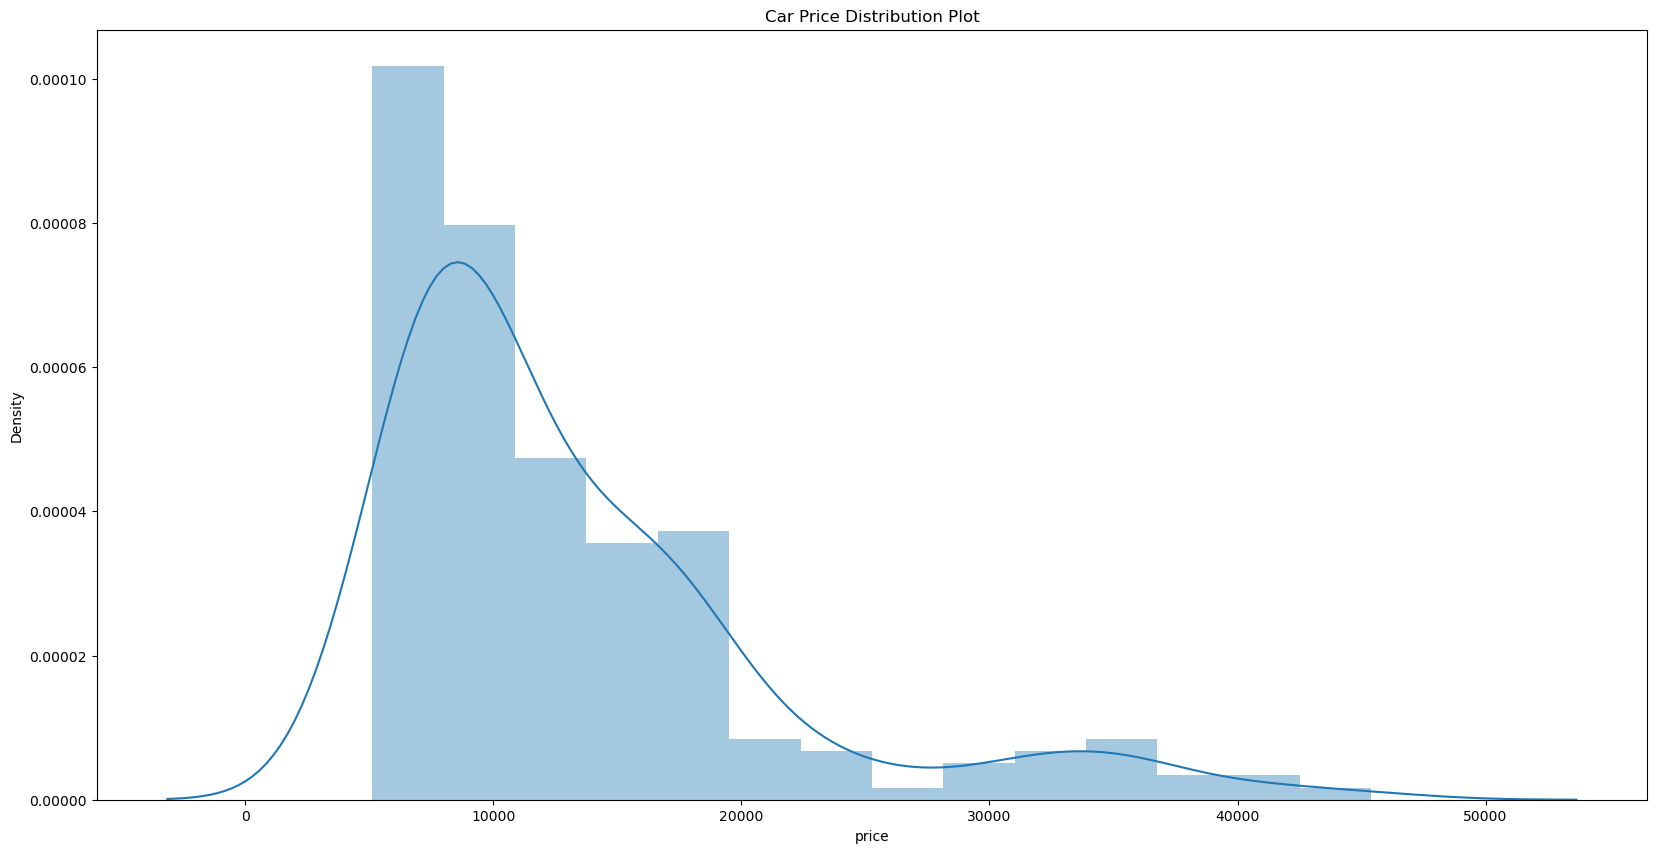

In [35]:
plt.title('Car Price Distribution Plot')
sns.distplot(data.price)
plt.show()

In [36]:
print(data.price.describe())

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


Data preporation

In [37]:
metadata_matrix_dataframe = get_meta_data(data)
list_potential_categorical_type(metadata_matrix_dataframe,data)

Datatype  Valeurs_Uniques_Count  \
index                                            
fuelsystem       object                      8   
enginetype       object                      7   
cylindernumber   object                      7   
symboling         int64                      6   
carbody          object                      5   
drivewheel       object                      3   
fueltype         object                      2   
aspiration       object                      2   
doornumber       object                      2   
enginelocation   object                      2   

                                                Valeurs_Uniques  
index                                                            
fuelsystem       [mpfi, 2bbl, mfi, 1bbl, spfi, 4bbl, idi, spdi]  
enginetype             [dohc, ohcv, ohc, l, rotor, ohcf, dohcv]  
cylindernumber     [four, six, five, three, twelve, two, eight]  
symboling                                  [3, 1, 2, 0, -1, -2]  
carbody         [convertible, hatchback, sedan, wagon, hardtop]  
drivewheel                                      [rwd, fwd, 4wd]  
fueltype                                          [gas, diesel]  
aspiration                                         [std, turbo]  
doornumber                                          [two, four]  
enginelocation                                    [front, rear]

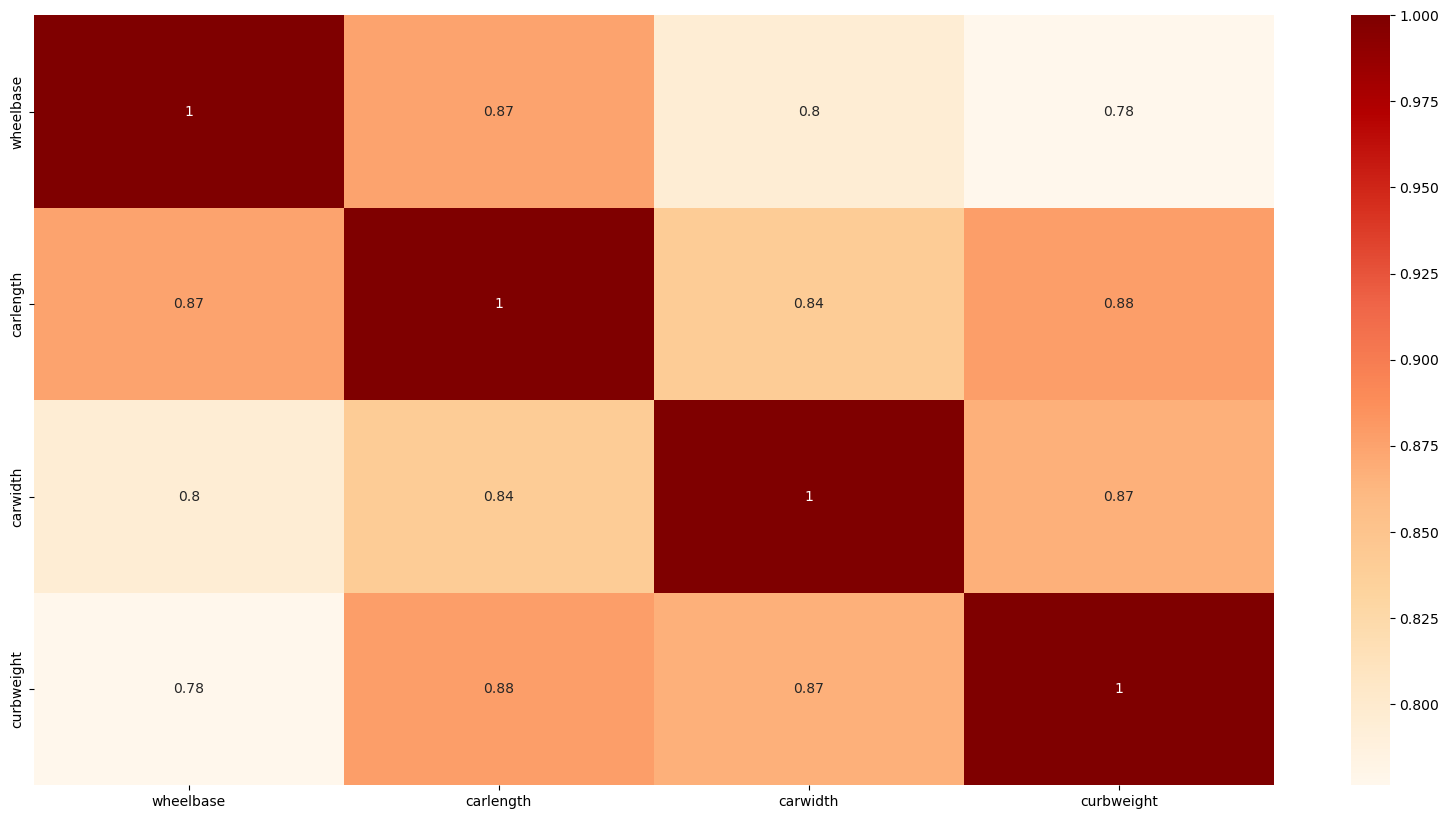

In [113]:
def heatmap(x,y,dataframe):
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()

dimension_col_list = ['wheelbase', 'carlength', 'carwidth','curbweight']

heatmap(10,10,data.filter(dimension_col_list))

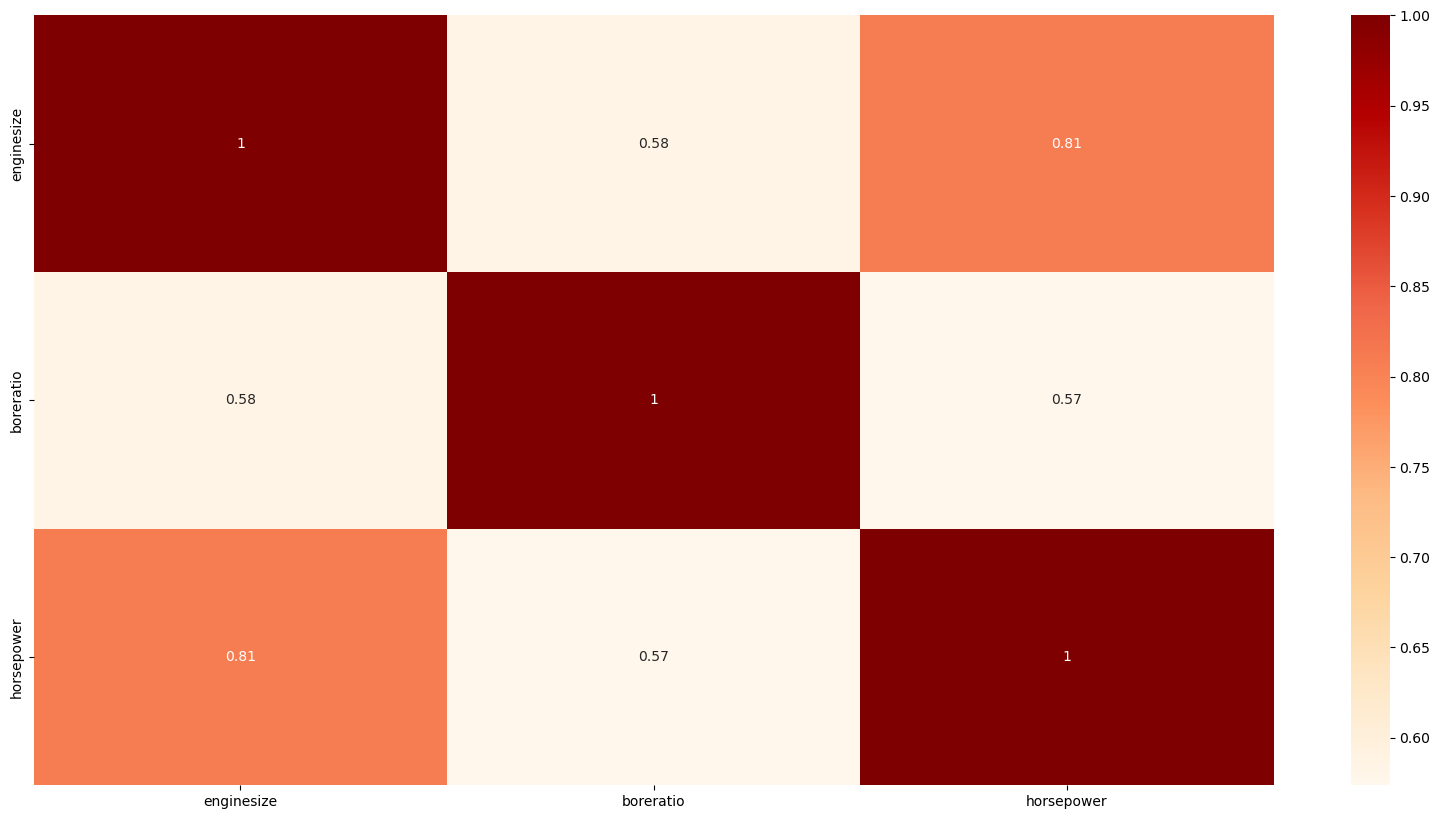

In [114]:
performance_col_list = ['enginesize','boreratio','horsepower']
heatmap(10,10,data.filter(performance_col_list))

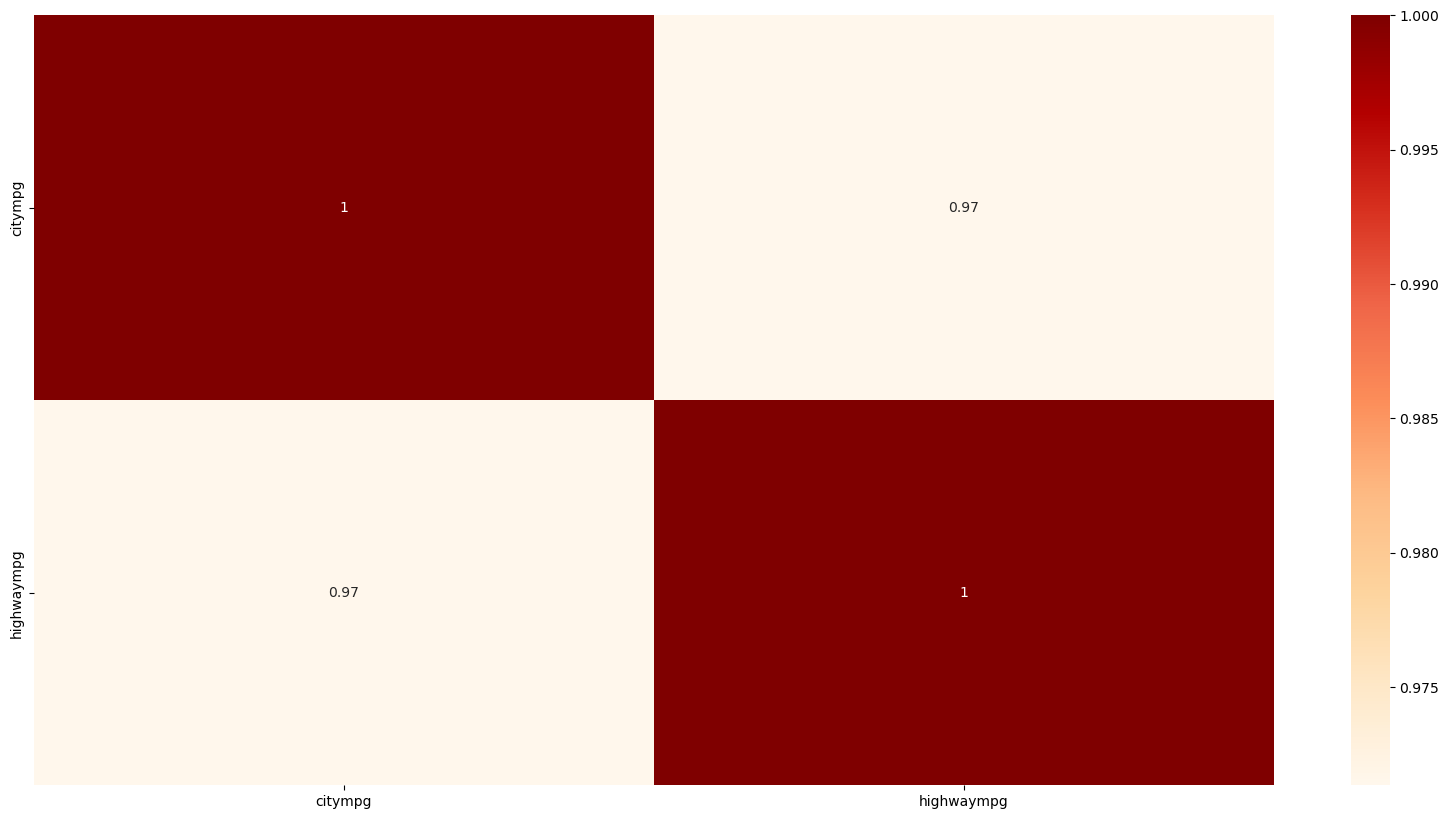

In [115]:
performance_col_list = ['citympg','highwaympg']
heatmap(10,10,data.filter(performance_col_list))

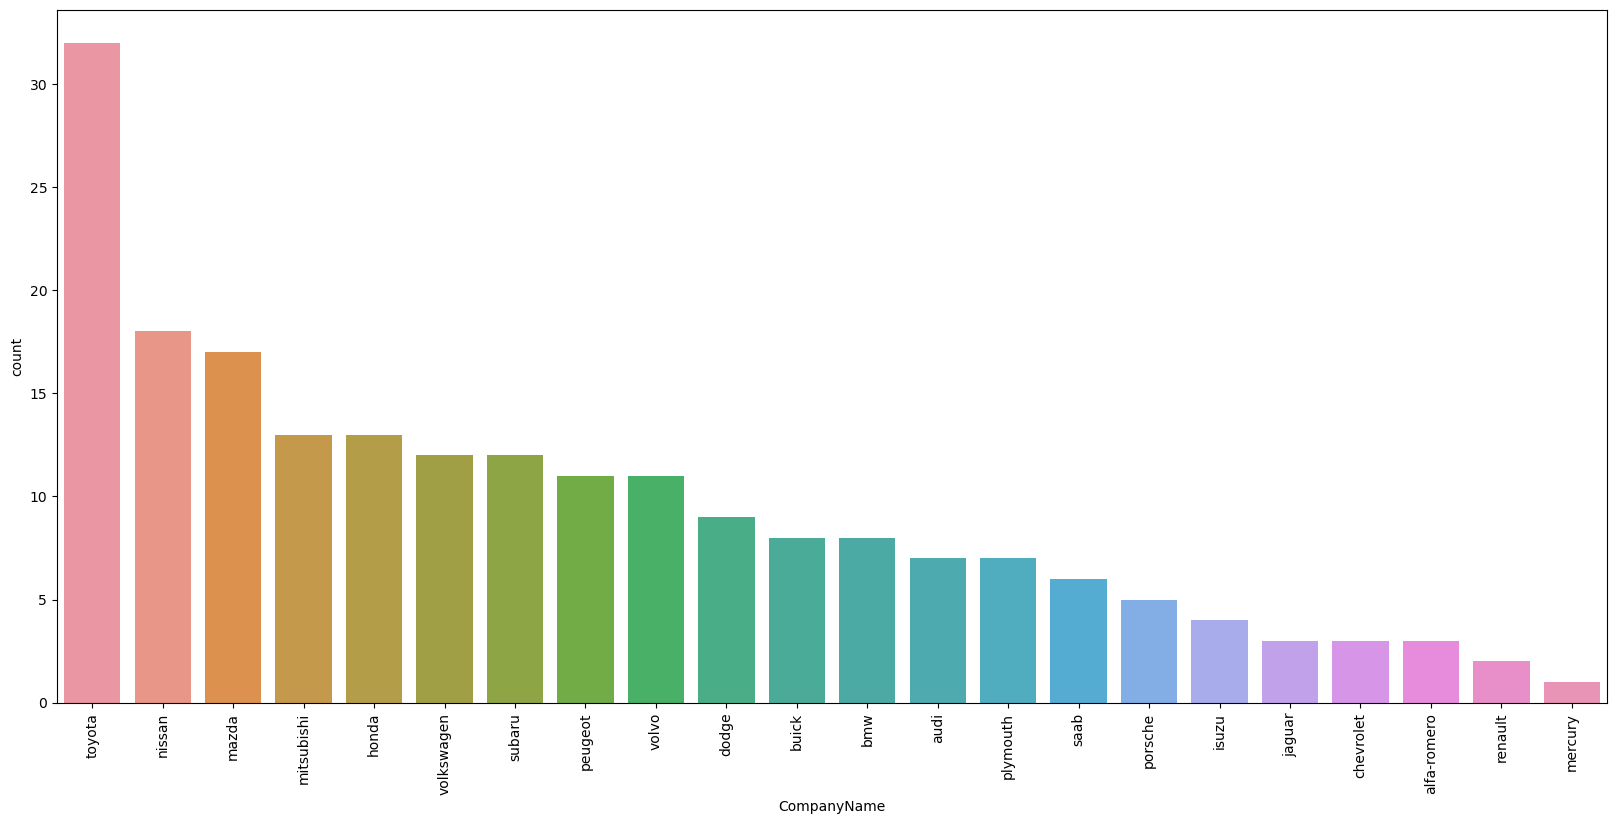

In [116]:
plt.figure(figsize=(20,9))

plt.xticks(rotation = 90)
order = data['CompanyName'].value_counts(ascending=False).index
sns.countplot(x='CompanyName', data=data, order=order)

plt.show()

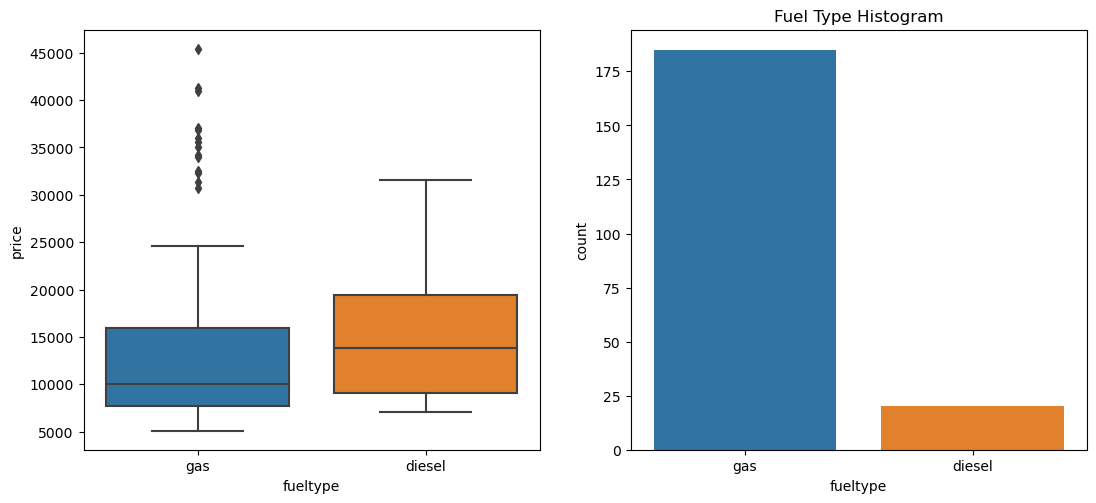

In [117]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('Fuel Type Histogram')
order = data['fueltype'].value_counts(ascending=False).index
sns.countplot(x='fueltype', data=data, order=order)

plt.show()

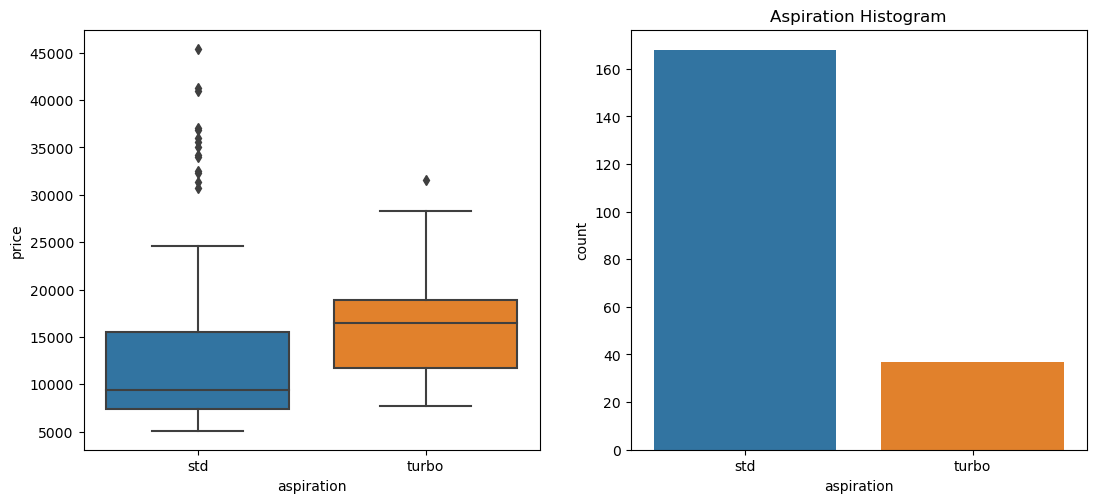

In [118]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'aspiration', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('Aspiration Histogram')
order = data['aspiration'].value_counts(ascending=False).index
sns.countplot(x='aspiration', data=data, order=order)

plt.show()

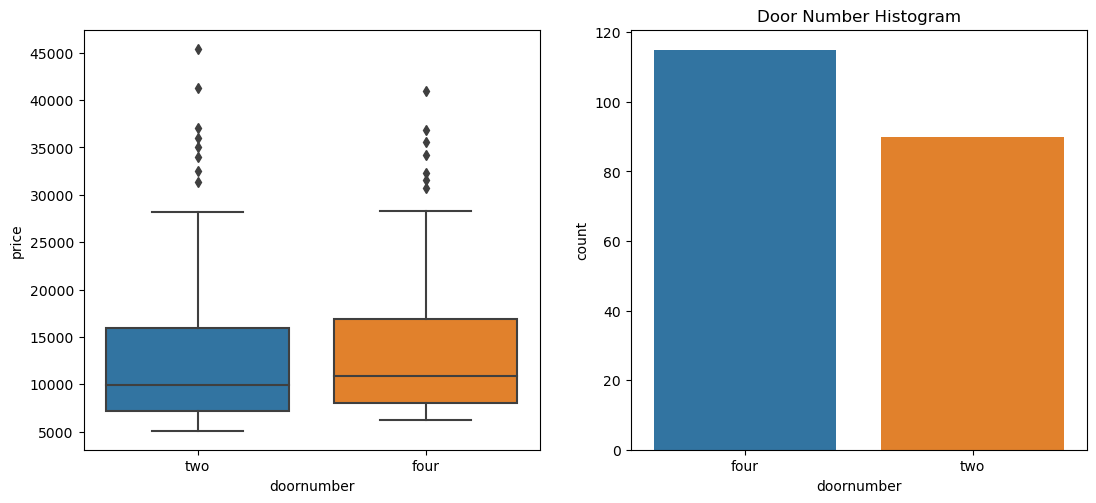

In [119]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('Door Number Histogram')
order = data['doornumber'].value_counts(ascending=False).index
sns.countplot(x='doornumber', data=data, order=order)

plt.show()

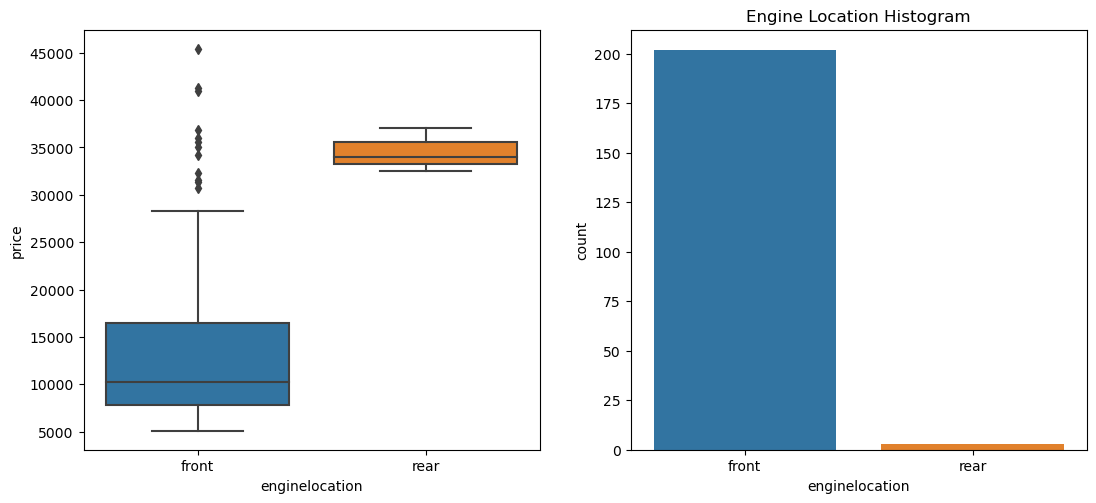

In [120]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('Engine Location Histogram')
order = data['enginelocation'].value_counts(ascending=False).index
sns.countplot(x='enginelocation', data=data, order=order)

plt.show()

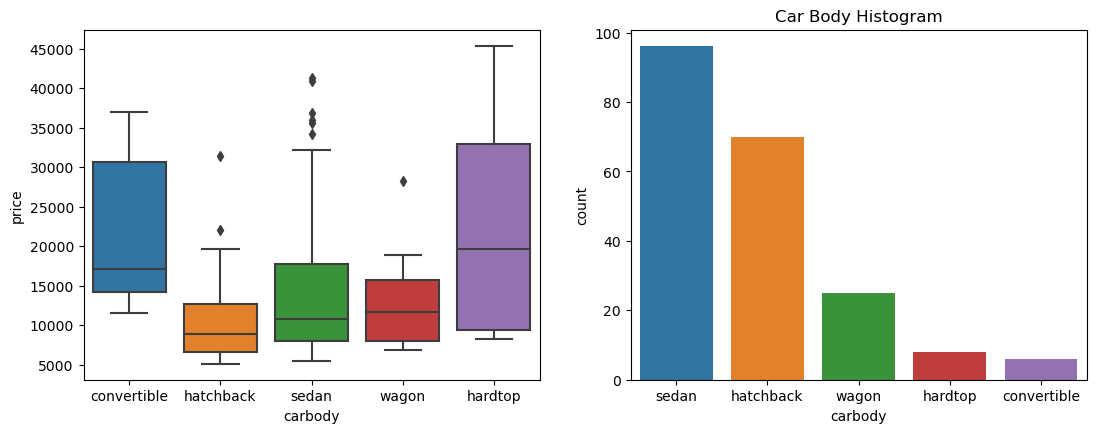

In [121]:
plt.subplot(2,3,1)
sns.boxplot(x='carbody',y='price',data = data)

plt.subplot(2,3,2)
plt.title('Car Body Histogram')
order = data['carbody'].value_counts(ascending=False).index
sns.countplot(x='carbody', data=data, order=order)

plt.show()

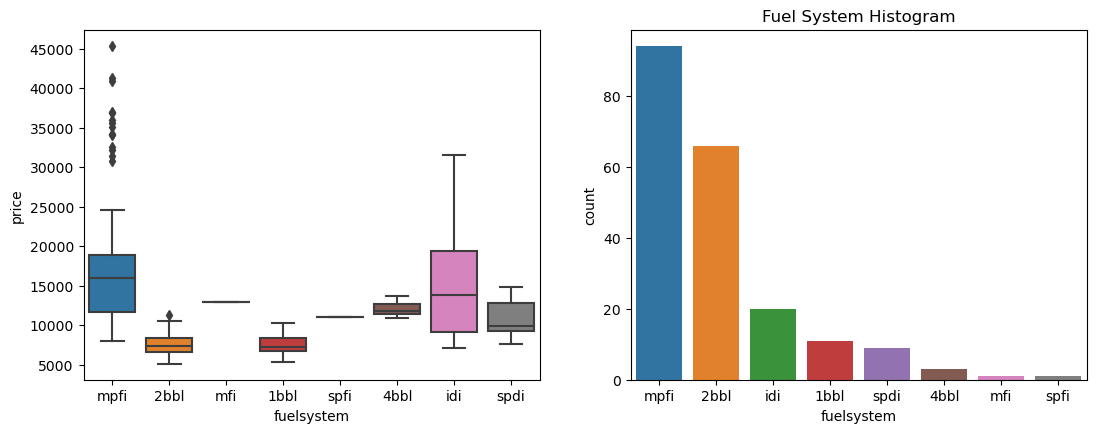

In [122]:
plt.subplot(2,3,1)
sns.boxplot(x='fuelsystem',y='price',data = data)

plt.subplot(2,3,2)
plt.title('Fuel System Histogram')
order = data['fuelsystem'].value_counts(ascending=False).index
sns.countplot(x='fuelsystem', data=data, order=order)

plt.show()

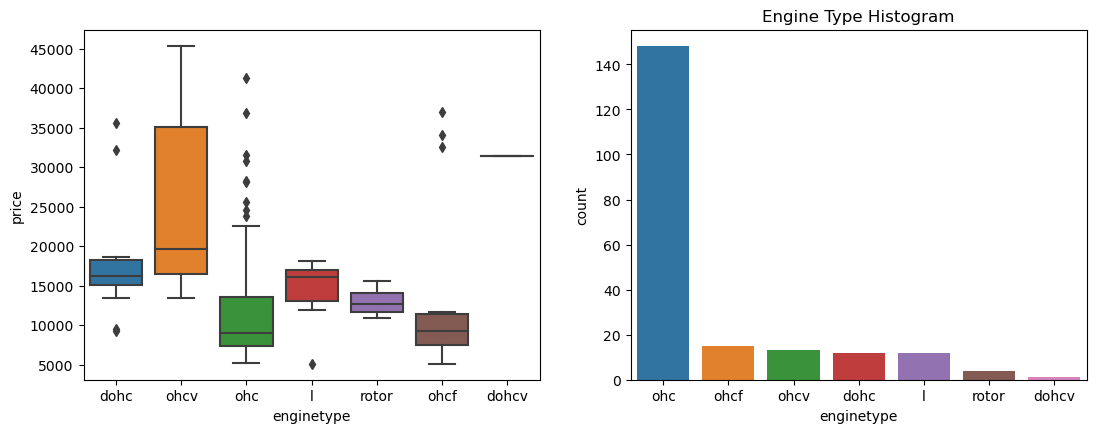

In [123]:
plt.subplot(2,3,1)
sns.boxplot(x='enginetype',y='price',data = data)

plt.subplot(2,3,2)
plt.title('Engine Type Histogram')
order = data['enginetype'].value_counts(ascending=False).index
sns.countplot(x='enginetype', data=data, order=order)

plt.show()

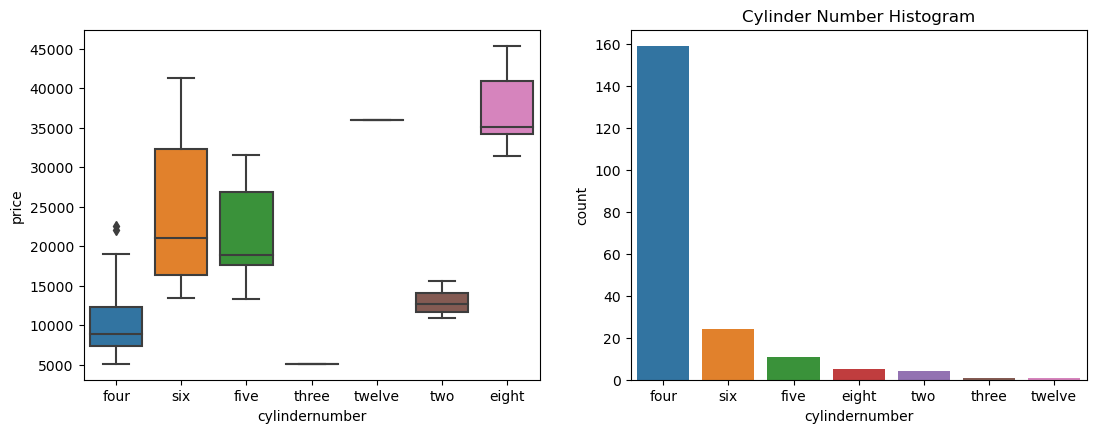

In [124]:
plt.subplot(2,3,1)
sns.boxplot(x='cylindernumber',y='price',data = data)

plt.subplot(2,3,2)
plt.title('Cylinder Number Histogram')
order = data['cylindernumber'].value_counts(ascending=False).index
sns.countplot(x='cylindernumber', data=data, order=order)

plt.show()

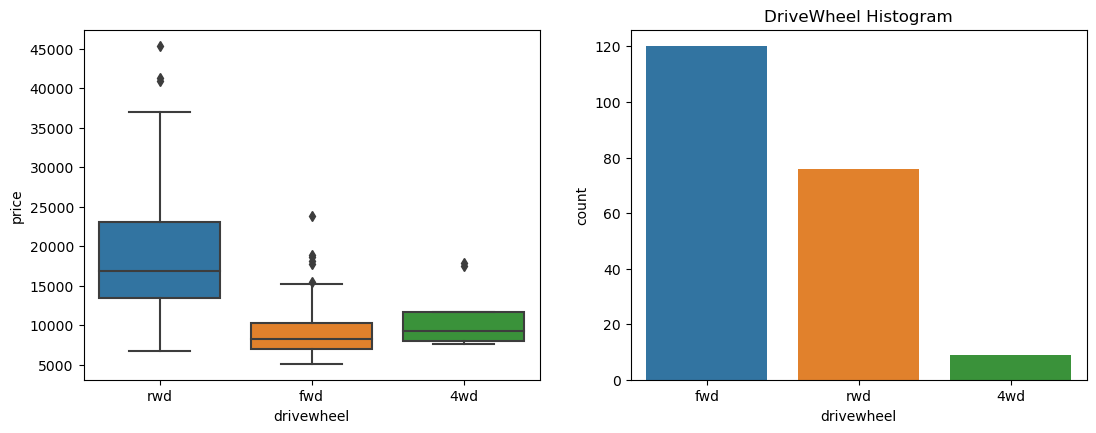

In [125]:
plt.subplot(2,3,1)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('DriveWheel Histogram')
order = data['drivewheel'].value_counts(ascending=False).index
sns.countplot(x='drivewheel', data=data, order=order)

plt.show()

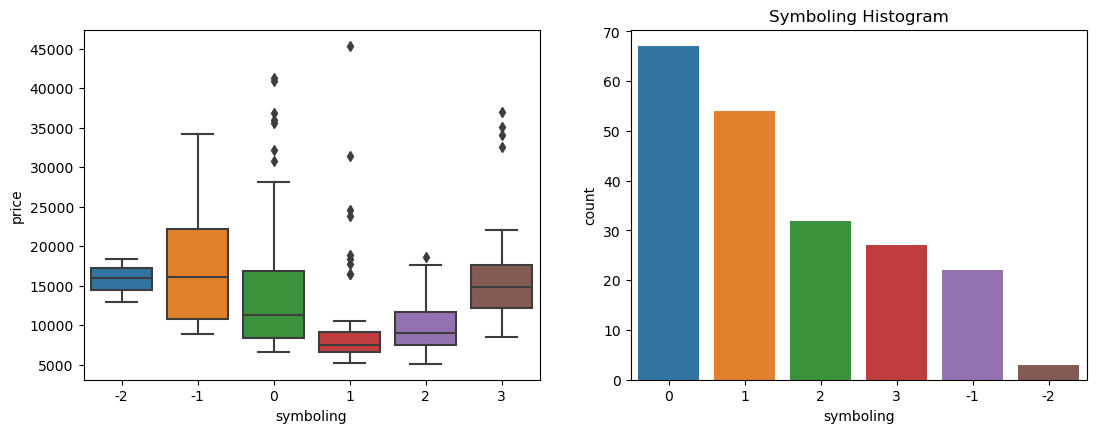

In [126]:
plt.subplot(2,3,1)
sns.boxplot(x=data.symboling, y=data.price)


plt.subplot(2,3,2)
plt.title('Symboling Histogram')
order = data['symboling'].value_counts(ascending=False).index
sns.countplot(x='symboling', data=data, order=order)

plt.show()

### На основании проведенного анализа, можно заметить, что некоторые данные не коррелируют со значением "Price", соответственно, мы можем исключить их из дальнейшего рассмотрения.

In [38]:
data = data.drop(['carheight', 'stroke', 'compressionratio', 'peakrpm', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'highwaympg', 'fuelsystem', 'boreratio'], axis=1)
data.head()

symboling  CompanyName fueltype aspiration doornumber      carbody  \
0          3  alfa-romero      gas        std        two  convertible   
1          3  alfa-romero      gas        std        two  convertible   
2          1  alfa-romero      gas        std        two    hatchback   
3          2         audi      gas        std       four        sedan   
4          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase enginetype cylindernumber  horsepower  \
0        rwd          front       88.6       dohc           four         111   
1        rwd          front       88.6       dohc           four         111   
2        rwd          front       94.5       ohcv            six         154   
3        fwd          front       99.8        ohc           four         102   
4        4wd          front       99.4        ohc           five         115   

   citympg    price  
0       21  13495.0  
1       21  16500.0  
2       19  16500.0  
3       24  13950.0  
4       18  17450.0

In [39]:
print("Все поля, которые пользователь должен ввести (варианты ввода нужно смотреть в базе данных)\n", data.columns)

Все поля, которые пользователь должен ввести (варианты ввода нужно смотреть в базе данных)
 Index(['symboling', 'CompanyName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'enginetype',
       'cylindernumber', 'horsepower', 'citympg', 'price'],
      dtype='object')


In [40]:
def binary_dummy_replace(x):
    return x.map({
        'gas': 1, 'diesel': 0,
        'std': 1, 'turbo': 0,
        'two': 1, 'four': 0,
        'front': 1, 'rear': 0
    })

def dummies(x, df):
    template = pd.get_dummies(df[x], prefix=x, drop_first=True)

    df = pd.concat([df, template], axis=1)
    df.drop([x], axis=1, inplace=True)
    return df

In [41]:
data = dummies('symboling', data)
data = dummies('CompanyName', data)
data = dummies('fueltype', data)
data = dummies('aspiration', data)
data = dummies('doornumber', data)
data = dummies('carbody', data)
data = dummies('drivewheel', data)
data = dummies('enginelocation', data)
data = dummies('enginetype', data)
data = dummies('cylindernumber', data)


In [42]:
data *= 1
data['price'] *= 40 # переводим цены по курсу 
data.head()

wheelbase  horsepower  citympg     price  symboling_-1  symboling_0  \
0       88.6         111       21  539800.0             0            0   
1       88.6         111       21  660000.0             0            0   
2       94.5         154       19  660000.0             0            0   
3       99.8         102       24  558000.0             0            0   
4       99.4         115       18  698000.0             0            0   

   symboling_1  symboling_2  symboling_3  CompanyName_audi  CompanyName_bmw  \
0            0            0            1                 0                0   
1            0            0            1                 0                0   
2            1            0            0                 0                0   
3            0            1            0                 1                0   
4            0            1            0                 1                0   

   CompanyName_buick  CompanyName_chevrolet  CompanyName_dodge  \
0                  0                      0                  0   
1                  0                      0                  0   
2                  0                      0                  0   
3                  0                      0                  0   
4                  0                      0                  0   

   CompanyName_honda  CompanyName_isuzu  CompanyName_jaguar  \
0                  0                  0                   0   
1                  0                  0                   0   
2                  0                  0                   0   
3                  0                  0                   0   
4                  0                  0                   0   

   CompanyName_mazda  CompanyName_mercury  CompanyName_mitsubishi  \
0                  0                    0                       0   
1                  0                    0                       0   
2                  0                    0                       0   
3                  0                    0                       0   
4                  0                    0                       0   

   CompanyName_nissan  CompanyName_peugeot  CompanyName_plymouth  \
0                   0                    0                     0   
1                   0                    0                     0   
2                   0                    0                     0   
3                   0                    0                     0   
4                   0                    0                     0   

   CompanyName_porsche  CompanyName_renault  CompanyName_saab  \
0                    0                    0                 0   
1                    0                    0                 0   
2                    0                    0                 0   
3                    0                    0                 0   
4                    0                    0                 0   

   CompanyName_subaru  CompanyName_toyota  CompanyName_volkswagen  \
0                   0                   0                       0   
1                   0                   0                       0   
2                   0                   0                       0   
3                   0                   0                       0   
4                   0                   0                       0   

   CompanyName_volvo  fueltype_gas  aspiration_turbo  doornumber_two  \
0                  0             1                 0               1   
1                  0             1                 0               1   
2                  0             1                 0               1   
3                  0             1                 0               0   
4                  0             1                 0               0   

   carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \
0                0                  0              0              0   
1                0                  0              0              0   
2                0             

In [43]:
from sklearn.model_selection import train_test_split

cars_train, cars_test = train_test_split(data, train_size=0.8, test_size=0.2, random_state = 5)

In [44]:
cars_test

wheelbase  horsepower  citympg      price  symboling_-1  symboling_0  \
154       95.7          62       27   315920.0             0            1   
21        93.7          68       37   222880.0             0            0   
198      104.3         162       17   736800.0             0            0   
48       113.0         176       15  1422000.0             0            1   
34        93.7          76       30   285160.0             0            0   
194      104.3         114       23   517600.0             0            0   
6        105.8         110       19   708400.0             0            0   
25        93.7          68       31   267680.0             0            0   
159       95.7          56       38   311520.0             0            1   
122       93.7          68       31   304360.0             0            0   
139       93.7          73       26   282120.0             0            0   
26        93.7          68       31   304360.0             0            0   
140       93.3          73       26   304120.0             0            0   
134       99.1         110       21   601600.0             0            0   
177      102.4          92       27   449920.0             1            0   
187       97.3          68       37   379800.0             0            0   
84        95.9         145       19   579560.0             0            0   
71       115.6         155       16  1367360.0             1            0   
77        93.7          68       31   247560.0             0            0   
93        94.5          69       31   293960.0             0            0   
152       95.7          62       31   259520.0             0            0   
87        96.3         116       23   371160.0             0            0   
42        96.5         100       25   413800.0             0            0   
117      108.0         142       18   726000.0             0            1   
61        98.8          84       26   423800.0             0            0   
28       103.3          88       24   356840.0             1            0   
3         99.8         102       24   558000.0             0            0   
153       95.7          62       31   276720.0             0            1   
200      109.1         114       23   673800.0             1            0   
54        93.1          68       31   295800.0             0            0   
185       97.3          85       27   327800.0             0            0   
95        94.5          69       31   311960.0             0            0   
204      109.1         114       19   905000.0             1            0   
191      100.4         110       19   531800.0             0            1   
39        96.5          86       27   353800.0             0            1   
148       96.9          82       23   320520.0             0            1   
56        95.3         101       17   473800.0             0            0   
17       110.0         182       15  1475200.0             0            1   
126       89.5         207       17  1301120.0             0            0   
51        93.1          68       31   243800.0             0            0   
40        96.5          86       27   411800.0             0            1   

     symboling_1  symboling_2  symboling_3  CompanyName_audi  CompanyName_bmw  \
154            0            0            0                 0                0   
21             1            0            0                 0                0   
198            0            0            0                 0                0   
48             0            0            0                 0                0   
34             1            0            0                 0                0   
194            0            0            0                 0                0   
6              1            0            0                 1                0   
25             1            0            0                 0                0   
159            0            0            

In [178]:
# from sklearn.preprocessing import StandardScaler, scale

# sc = StandardScaler()

# col_to_scale = ['wheelbase','boreratio','horsepower','citympg','price',]

# cars_train[col_to_scale] = sc.fit_transform(cars_train[col_to_scale])
# cars_test[col_to_scale] = sc.fit_transform(cars_test[col_to_scale])

# cars_train.head()

wheelbase  boreratio  horsepower   citympg     price  symboling_-1  \
51   -0.954839  -1.204481   -0.983277  1.050432 -0.930542             0   
139  -0.861013   0.997141   -0.852449  0.199595 -0.812029             0   
141  -0.313694   0.997141   -0.616958  1.220600 -0.802999             0   
112   1.359537   1.295666   -0.276805  0.539930  0.406127             0   
96   -0.735911  -0.756693   -0.957112  1.050432 -0.756855             0   

     symboling_0  symboling_1  symboling_2  symboling_3  CompanyName_audi  \
51             0            1            0            0                 0   
139            0            0            1            0                 0   
141            1            0            0            0                 0   
112            1            0            0            0                 0   
96             0            1            0            0                 0   

     CompanyName_bmw  CompanyName_buick  CompanyName_chevrolet  \
51                 0                  0                      0   
139                0                  0                      0   
141                0                  0                      0   
112                0                  0                      0   
96                 0                  0                      0   

     CompanyName_dodge  CompanyName_honda  CompanyName_isuzu  \
51                   0                  0                  0   
139                  0                  0                  0   
141                  0                  0                  0   
112                  0                  0                  0   
96                   0                  0                  0   

     CompanyName_jaguar  CompanyName_mazda  CompanyName_mercury  \
51                    0                  1                    0   
139                   0                  0                    0   
141                   0                  0                    0   
112                   0                  0                    0   
96                    0                  0                    0   

     CompanyName_mitsubishi  CompanyName_nissan  CompanyName_peugeot  \
51                        0                   0                    0   
139                       0                   0                    0   
141                       0                   0                    0   
112                       0                   0                    1   
96                        0                   1                    0   

     CompanyName_plymouth  CompanyName_porsche  CompanyName_renault  \
51                      0                    0                    0   
139                     0                    0                    0   
141                     0                    0                    0   
112                     0                    0                    0   
96                      0                    0                    0   

     CompanyName_saab  CompanyName_subaru  CompanyName_toyota  \
51                  0                   0                   0   
139                 0                   1                   0   
141                 0                   1                   0   
112                 0                   0                   0   
96                  0                   0                   0   

     CompanyName_volkswagen  CompanyName_volvo  fueltype_gas  \
51                        0                  0             1   
139                       0                  0             1   
141                       0                  0             1   
112                       0                  0             0   
96                        0                  0             1   

     aspiration_turbo  doornumber_two  carbody_hardtop  carbody_hatchback  \
51                  0               1                0                  1   
139                 0               1                0                  1   
141                 0               0  

In [45]:
y_train = cars_train.loc[:,cars_train.columns == 'price']

X_train = cars_train.loc[:, cars_train.columns != 'price']

In [46]:
y_test = cars_test.loc[:,cars_test.columns == 'price']

X_test = cars_test.loc[:, cars_test.columns != 'price']

In [47]:
y_test

price
154   315920.0
21    222880.0
198   736800.0
48   1422000.0
34    285160.0
194   517600.0
6     708400.0
25    267680.0
159   311520.0
122   304360.0
139   282120.0
26    304360.0
140   304120.0
134   601600.0
177   449920.0
187   379800.0
84    579560.0
71   1367360.0
77    247560.0
93    293960.0
152   259520.0
87    371160.0
42    413800.0
117   726000.0
61    423800.0
28    356840.0
3     558000.0
153   276720.0
200   673800.0
54    295800.0
185   327800.0
95    311960.0
204   905000.0
191   531800.0
39    353800.0
148   320520.0
56    473800.0
17   1475200.0
126  1301120.0
51    243800.0
40    411800.0

In [48]:
import statsmodels.api as sm

lm = sm.OLS(y_train, X_train).fit()

y_pred = lm.predict(X_test)


In [49]:
y_pred

154    2.477654e+05
21     2.493535e+05
198    8.099236e+05
48     1.290000e+06
34     3.098664e+05
194    6.365342e+05
6      7.364852e+05
25     2.508678e+05
159    3.387270e+05
122    2.428164e+05
139    2.017264e+05
26     2.508678e+05
140    2.291402e+05
134    5.741799e+05
177    3.702107e+05
187    4.090178e+05
84     5.199547e+05
71     1.497158e+06
77     1.925165e+05
93     2.607745e+05
152    2.455572e+05
87     4.479203e+05
42     4.332917e+05
117    7.152513e+05
61     4.020147e+05
28     3.375114e+05
3      2.319049e+05
153    2.278410e+05
200    6.818834e+05
54     3.090661e+05
185    3.636917e+05
95     2.569376e+05
204    6.529231e+05
191    8.958189e+05
39     3.824030e+05
148    3.336250e+05
56     4.882916e+05
17     1.297701e+06
126    1.347883e+06
51     2.903571e+05
40     3.824030e+05
dtype: float64

In [50]:
resid = y_test - y_pred.to_frame('price')

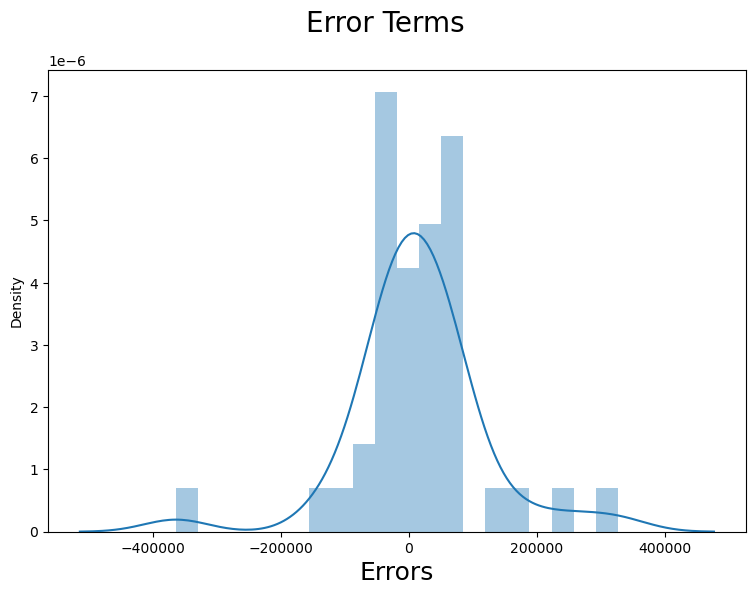

In [51]:
fig = plt.figure(figsize=(9,6))
sns.distplot(resid, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

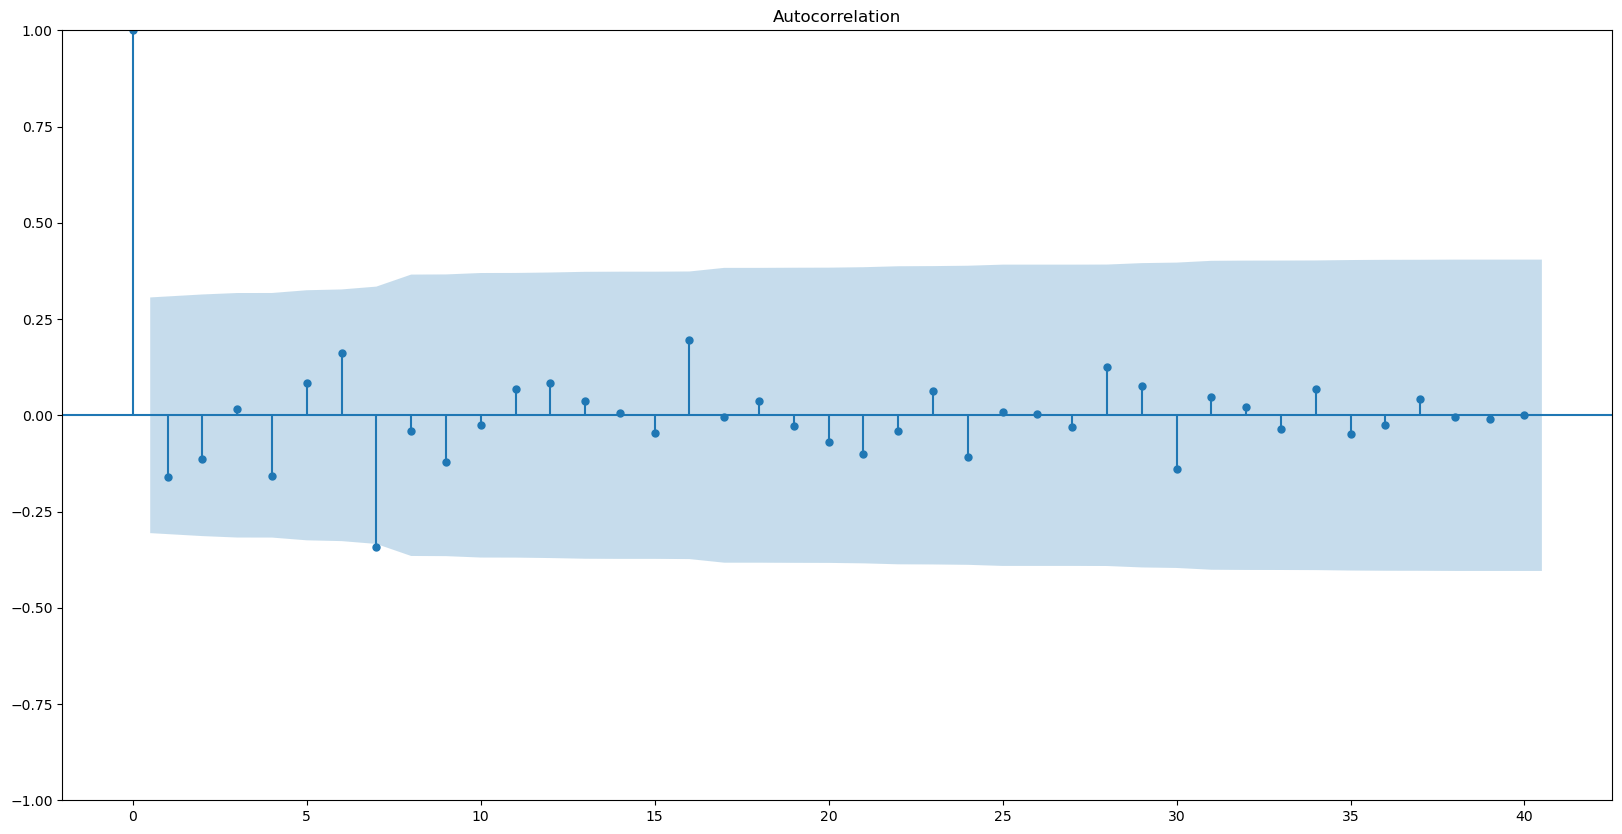

In [52]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(resid, lags=40 , alpha=0.05)
acf.show()

In [53]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8994516857897239

In [55]:
''' это коэфициенты, на которые мы должны умножать уже отформатированные данные '''
params = lm.params
params 

wheelbase                   9934.397110
horsepower                  4335.025162
citympg                     2865.776391
symboling_-1               -2335.889772
symboling_0                49417.176360
symboling_1                58158.693791
symboling_2                14951.027648
symboling_3                38623.141313
CompanyName_audi         -303089.086473
CompanyName_bmw           174149.668150
CompanyName_buick         -87589.619288
CompanyName_chevrolet    -155824.141881
CompanyName_dodge        -139403.603856
CompanyName_honda         -93510.483888
CompanyName_isuzu         -77061.798244
CompanyName_jaguar        258183.409597
CompanyName_mazda         -75244.665537
CompanyName_mercury      -245436.811950
CompanyName_mitsubishi   -135838.239525
CompanyName_nissan       -126907.374407
CompanyName_peugeot       178391.645681
CompanyName_plymouth     -147454.964643
CompanyName_porsche       197384.390403
CompanyName_renault       -59993.185897
CompanyName_saab           15094.024831


In [205]:
# можно создать два вектора (один - координаты, другой - веса) и скалярно перемножить
# их - получим как раз искомый ответ


Что еще нужно сделать?

1. Нужно, что бы при вводе данных, они преобразовывались в нужный для модели вид
2. И соответсвенно форма, куда эти данные должны вводиться
3. Мащины должны быть только из списка, на котором тренеровалась модель

def binary_dummy_replace(x):
    return x.map({
        'gas': 1, 'diesel': 0,
        'std': 1, 'turbo': 0,
        'two': 1, 'four': 0,
        'front': 1, 'rear': 0
    })

def dummies(x, df):
    template = pd.get_dummies(df[x], prefix=x, drop_first=True)

    df = pd.concat([df, template], axis=1)
    df.drop([x], axis=1, inplace=True)
    return df

data = dummies('symboling', data)
data = dummies('CompanyName', data)
data = dummies('fueltype', data)
data = dummies('aspiration', data)
data = dummies('doornumber', data)
data = dummies('carbody', data)
data = dummies('drivewheel', data)
data = dummies('enginelocation', data)
data = dummies('enginetype', data)
data = dummies('cylindernumber', data)
data = dummies('fuelsystem', data)

data *= 1
data.head()